In [333]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [334]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

In [335]:
## Load Data

In [374]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [375]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)

dwelling_types_per_year = to_data.groupby('year').sum()

df = pd.DataFrame(dwelling_types_per_year) 

df.drop(columns = ['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], inplace = True)

df.head()


,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [338]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

df.to_csv('dwelling_types.csv')


In [377]:
# Helper create_bar_chart function
def create_bar_chart(data_df, year_index, xlabel, ylabel,title, color):

    cols = list(data_df.columns)
    row = data_df.loc[year_index,:].values.tolist()
    
    # creating the bar plot
    plt.bar(cols, row, color = color,
    width = 0.4)
 
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12
    plt.title(title,fontsize=14,fontweight = "bold")
    plt.xticks(rotation=90)
    return plt.show()


SyntaxError: invalid syntax (<ipython-input-377-08b18e90c12a>, line 13)

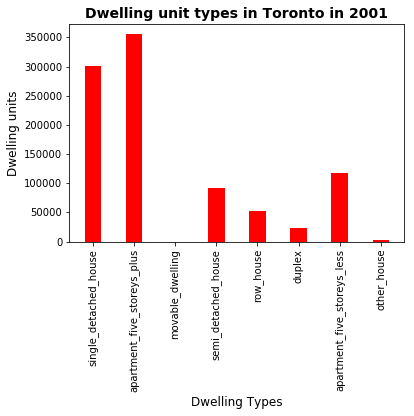

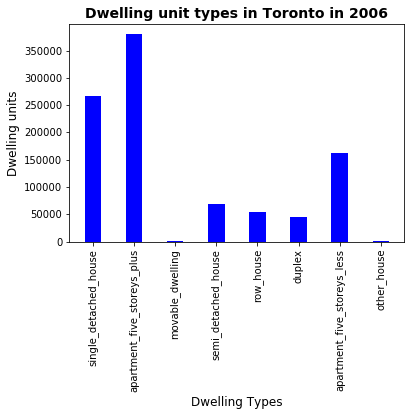

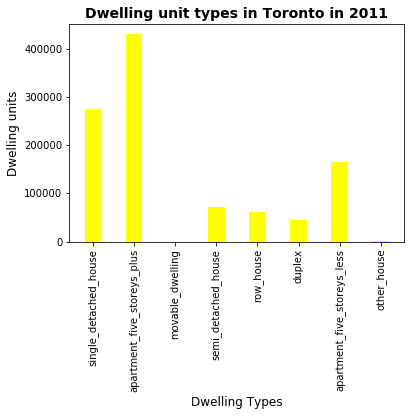

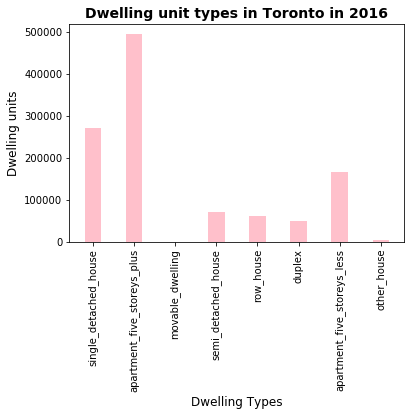

In [359]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001

create_bar_chart(df,2001,"Dwelling Types","Dwelling units","Dwelling unit types in Toronto in 2001","red")

# Bar chart for 2006

create_bar_chart(df,2006,"Dwelling Types","Dwelling units","Dwelling unit types in Toronto in 2006","blue")

# Bar chart for 2011

create_bar_chart(df,2011,"Dwelling Types","Dwelling units","Dwelling unit types in Toronto in 2011","yellow")

# Bar chart for 2016

create_bar_chart(df,2016,"Dwelling Types","Dwelling units","Dwelling unit types in Toronto in 2016","pink")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [340]:
# Calculate the average monthly shelter costs for owned and rented dwellings

average_yearly_dwellings_cost = to_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby("year").mean().sort_values("year")

average_yearly_dwellings_cost.head()

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [341]:
# Helper create_line_chart function
def create_line_chart(data, xlabel, ylabel, title, color):
    return data.hvplot.line(x=xlabel, y=ylabel, title=title, color=color)

    fig_dwelling_types = plt.figure()
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title,fontsize=14,fontweight = "bold")
    plt.xticks(rotation=90)
    return plt.show()



In [342]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelling and other for rented dwellings per year

#Create line chart for shelter costs owned: 

create_line_chart(average_yearly_dwellings_cost, "year", "shelter_costs_owned", "Average monthly shelter cost for owned Dwellings in Toronto", "blue")

:Curve   [year]   (shelter_costs_owned)

In [343]:
#Create line chart for shelter costs rented:
create_line_chart(average_yearly_dwellings_cost, "year", "shelter_costs_rented", "Average monthly shelter cost for rented Dwellings in Toronto", "yellow")

:Curve   [year]   (shelter_costs_rented)

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [344]:
# Calculate the average house value per year

yearly_house_value = to_data["average_house_value"]

average_house_value = yearly_house_value.groupby("year").mean()

average_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

In [345]:
# Plot the average house value per year as a line chart

def create_line_chart(data_df, xlabel, ylabel, title, color):
    return data_df.hvplot.line(x=xlabel, y=ylabel, title=title, color=color)

    fig_dwelling_types = plt.figure()
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title,fontsize=14,fontweight = "bold")
    plt.xticks(rotation=90)
    return plt.show()

average_house_value.hvplot.line(x="year",ylabel="Average House Value", title="Average House Value in Toronto", color="blue").opts(
    yformatter="%.0f")

:Curve   [year]   (average_house_value)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [346]:
# Create a new DataFrame with the mean house values by neighbourhood per year

file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data_new = pd.read_csv(file_path)

yearly_neighbourhood_value = to_data_new[["year","neighbourhood","average_house_value"]]

yearly_neighbourhood_house_value = yearly_neighbourhood_value.groupby(["year","neighbourhood"]).mean()

yearly_neighbourhood_house_value.reset_index(inplace=True)

yearly_neighbourhood_house_value.head(10)

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


In [347]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

yearly_neighbourhood_house_value.set_index("neighbourhood").head()


,year,average_house_value
neighbourhood,,
Agincourt North,2001,200388
Agincourt South-Malvern West,2001,203047
Alderwood,2001,259998
Annex,2001,453850
Banbury-Don Mills,2001,371864


In [357]:
line_chart1 = yearly_neighbourhood_house_value["average_house_value"]

chart1 = line_chart1.sort_values()

chart2 = chart1.hvplot.line("year", "average_house_value", rot=90)

In [358]:
def create_line_chart(data_df, xlabel, ylabel, title, color):
    return data_df.hvplot.line(x=xlabel, y=ylabel, title=title, color=color)

chart2.hvplot.bivariate(x='year', y='average_house_value', width=600, groupby='neighbourhood')

AttributeError: 'Curve' object has no attribute 'hvplot'

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [366]:
# Fetch the data of all dwelling types per year

file_path = Path("toronto_neighbourhoods_census_data.csv")
dwelling_types_yearly = pd.read_csv(file_path)
dwelling_types_yearly.reset_index(inplace = True)
dwelling_types_yearly.drop(columns = ['index'], inplace = True)
dwelling_types_yearly.head(10)

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
5,2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
6,2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
7,2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
8,2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018
9,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491


In [398]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

dwelling_types_per_neighbourhood = pd.DataFrame(dwelling_types_yearly
    {"neighbourhood": ["Agincourt North"],
        "year": (2001, 2006, 2011, 2016)})

SyntaxError: invalid syntax (<ipython-input-398-6cd7766eb2c7>, line 5)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [ ]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

In [ ]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [393]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [ ]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

In [ ]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [ ]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [ ]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [ ]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [ ]:
# Create the sunburst chart
# YOUR CODE HERE!